In [2]:
#installing the latest version of tensorflow
!pip install tensorflow

#verify the installation

import tensorflow as tf
from tensorflow import keras 

#Check tf.keras version
#print(tf.keras.__version__)


In [3]:
# Loading MNIST dataset
mnist = keras.datasets.mnist 

#Splitting into train and test
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 16s 1us/step


In [4]:
# Data Exploration
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784. 
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED) 
X_test = X_test.reshape(10000, RESHAPED) 

# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples') 

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

60000 train samples
10000 test samples


In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_1 = Sequential()

# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_1.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax')) 

In [15]:
# Compiling the model.
model_1.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Training the model. 
training = model_1.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2) 

Epoch 1/70
750/750 [==============================] - 1s 1ms/step - loss: 1.0859 - accuracy: 0.7437 - val_loss: 0.6563 - val_accuracy: 0.8569
Epoch 2/70
750/750 [==============================] - 1s 880us/step - loss: 0.6090 - accuracy: 0.8532 - val_loss: 0.5089 - val_accuracy: 0.8763
Epoch 3/70
750/750 [==============================] - 1s 893us/step - loss: 0.5137 - accuracy: 0.8681 - val_loss: 0.4508 - val_accuracy: 0.8852
Epoch 4/70
750/750 [==============================] - 1s 927us/step - loss: 0.4672 - accuracy: 0.8770 - val_loss: 0.4181 - val_accuracy: 0.8907
Epoch 5/70
750/750 [==============================] - 1s 918us/step - loss: 0.4384 - accuracy: 0.8829 - val_loss: 0.3970 - val_accuracy: 0.8949
Epoch 6/70
750/750 [==============================] - 1s 951us/step - loss: 0.4184 - accuracy: 0.8874 - val_loss: 0.3821 - val_accuracy: 0.8972
Epoch 7/70
750/750 [==============================] - 1s 898us/step - loss: 0.4034 - accuracy: 0.8899 - val_loss: 0.3704 - val_accuracy: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


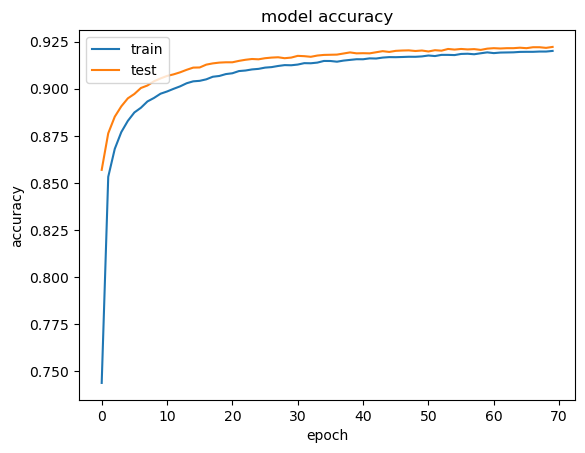

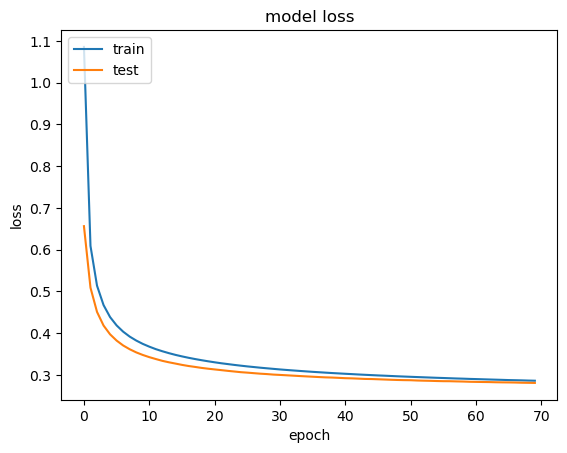

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in training
print(training.history.keys())

# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 631us/step - loss: 0.2821 - accuracy: 0.9219
Test accuracy: 0.9218999743461609


In [20]:
model_1.get_config()

{'name': 'sequential_3',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'bu

In [21]:
#Most common type of model is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:

model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, you don't need to specify the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

# Compiling the model.
model_2.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model. 
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2) 

Epoch 1/100
750/750 [==============================] - 1s 1ms/step - loss: 1.0355 - accuracy: 0.7376 - val_loss: 0.4690 - val_accuracy: 0.8798
Epoch 2/100
750/750 [==============================] - 1s 1ms/step - loss: 0.4204 - accuracy: 0.8854 - val_loss: 0.3476 - val_accuracy: 0.9013
Epoch 3/100
750/750 [==============================] - 1s 1ms/step - loss: 0.3450 - accuracy: 0.9025 - val_loss: 0.3032 - val_accuracy: 0.9122
Epoch 4/100
750/750 [==============================] - 1s 1ms/step - loss: 0.3086 - accuracy: 0.9121 - val_loss: 0.2771 - val_accuracy: 0.9197
Epoch 5/100
750/750 [==============================] - 1s 1ms/step - loss: 0.2835 - accuracy: 0.9186 - val_loss: 0.2613 - val_accuracy: 0.9250
Epoch 6/100
750/750 [==============================] - 1s 1ms/step - loss: 0.2640 - accuracy: 0.9247 - val_loss: 0.2468 - val_accuracy: 0.9285
Epoch 7/100
750/750 [==============================] - 1s 1ms/step - loss: 0.2474 - accuracy: 0.9292 - val_loss: 0.2345 - val_accuracy: 0.9329

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


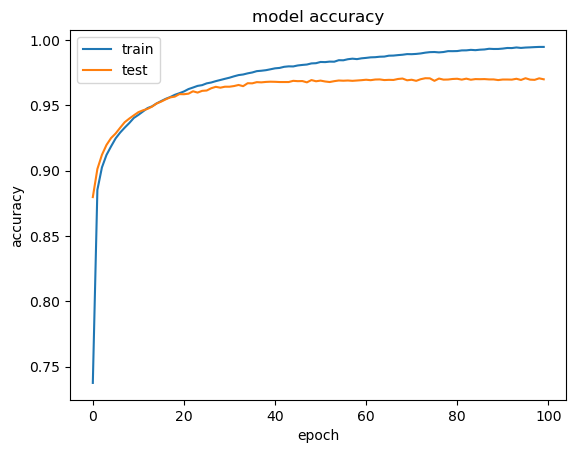

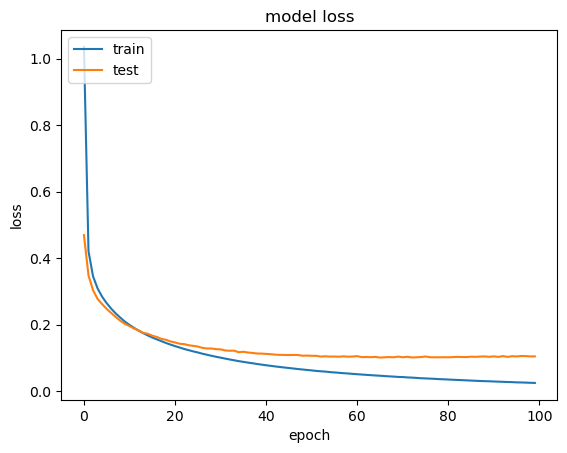

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in training
print(training.history.keys())

# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
#evaluate the model
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 680us/step - loss: 0.0956 - accuracy: 0.9718
Test accuracy: 0.9718000292778015


In [24]:
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_3 = tf.keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:
N_hidden = 128


# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_3.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))

#Adding a dropout layer to avoid the overfitting
model_3.add(Dropout(0.3))

# Adding another dense layer:
model_3.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_3.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_3.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

# Compiling the model.
model_3.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model. 
training = model_3.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2) 

Epoch 1/50
750/750 [==============================] - 1s 1ms/step - loss: 1.3334 - accuracy: 0.5762 - val_loss: 0.5392 - val_accuracy: 0.8706
Epoch 2/50
750/750 [==============================] - 1s 1ms/step - loss: 0.6533 - accuracy: 0.8023 - val_loss: 0.3717 - val_accuracy: 0.9008
Epoch 3/50
750/750 [==============================] - 1s 1ms/step - loss: 0.5122 - accuracy: 0.8471 - val_loss: 0.3155 - val_accuracy: 0.9100
Epoch 4/50
750/750 [==============================] - 1s 1ms/step - loss: 0.4498 - accuracy: 0.8673 - val_loss: 0.2837 - val_accuracy: 0.9172
Epoch 5/50
750/750 [==============================] - 1s 1ms/step - loss: 0.4083 - accuracy: 0.8811 - val_loss: 0.2604 - val_accuracy: 0.9238
Epoch 6/50
750/750 [==============================] - 1s 1ms/step - loss: 0.3739 - accuracy: 0.8880 - val_loss: 0.2426 - val_accuracy: 0.9280
Epoch 7/50
750/750 [==============================] - 1s 1ms/step - loss: 0.3518 - accuracy: 0.8959 - val_loss: 0.2274 - val_accuracy: 0.9321
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


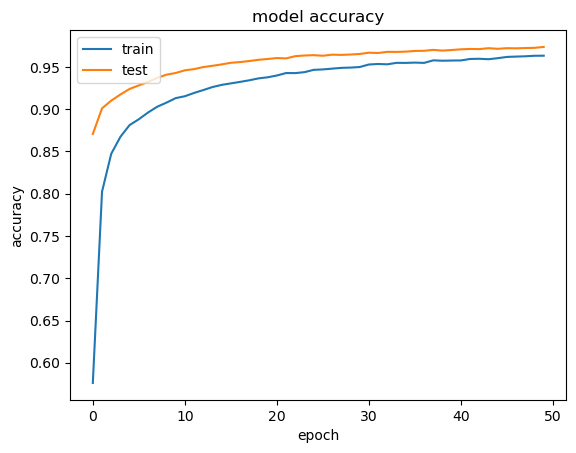

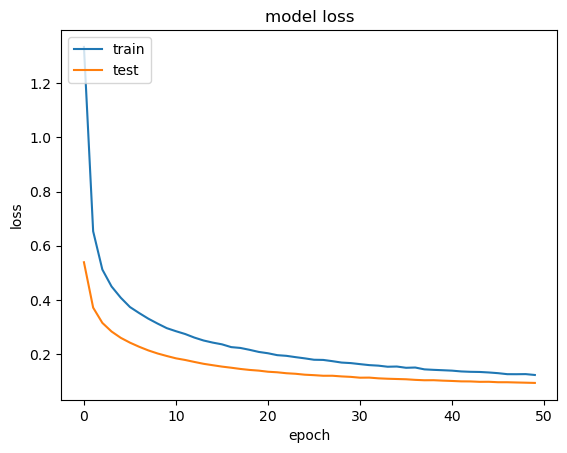

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 708us/step - loss: 0.0915 - accuracy: 0.9737
Test accuracy: 0.9736999869346619


In [27]:
#Most common type of model is a stack of layers
model_4 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_4.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_4.add(Dropout(0.3))
# Adding another dense layer:
model_4.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_4.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

# Compiling the model.
model_4.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Training the model. 
training = model_4.fit(X_train, Y_train, batch_size=128, epochs=31, validation_split=0.2) 

Epoch 1/31
375/375 [==============================] - 3s 8ms/step - loss: 0.3025 - accuracy: 0.9086 - val_loss: 0.1269 - val_accuracy: 0.9607
Epoch 2/31
375/375 [==============================] - 3s 8ms/step - loss: 0.1274 - accuracy: 0.9605 - val_loss: 0.1010 - val_accuracy: 0.9682
Epoch 3/31
375/375 [==============================] - 3s 8ms/step - loss: 0.0912 - accuracy: 0.9713 - val_loss: 0.0850 - val_accuracy: 0.9737
Epoch 4/31
375/375 [==============================] - 3s 8ms/step - loss: 0.0729 - accuracy: 0.9760 - val_loss: 0.0785 - val_accuracy: 0.9770
Epoch 5/31
375/375 [==============================] - 3s 8ms/step - loss: 0.0611 - accuracy: 0.9804 - val_loss: 0.0724 - val_accuracy: 0.9781
Epoch 6/31
375/375 [==============================] - 3s 8ms/step - loss: 0.0510 - accuracy: 0.9833 - val_loss: 0.0744 - val_accuracy: 0.9784
Epoch 7/31
375/375 [==============================] - 3s 8ms/step - loss: 0.0455 - accuracy: 0.9849 - val_loss: 0.0761 - val_accuracy: 0.9786
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


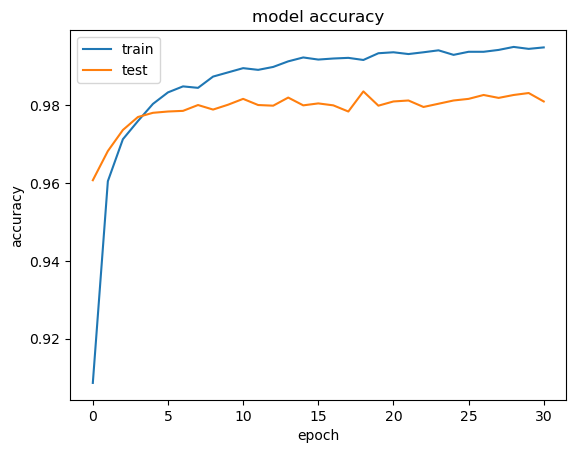

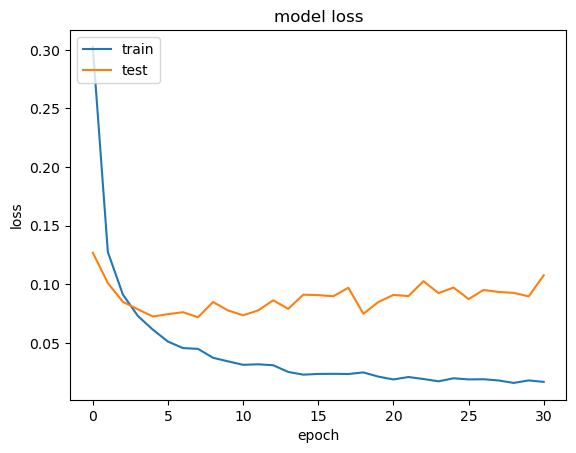

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
#evaluate the model_4
test_loss, test_acc = model_4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0888 - accuracy: 0.9835
Test accuracy: 0.9835000038146973
